In [ ]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


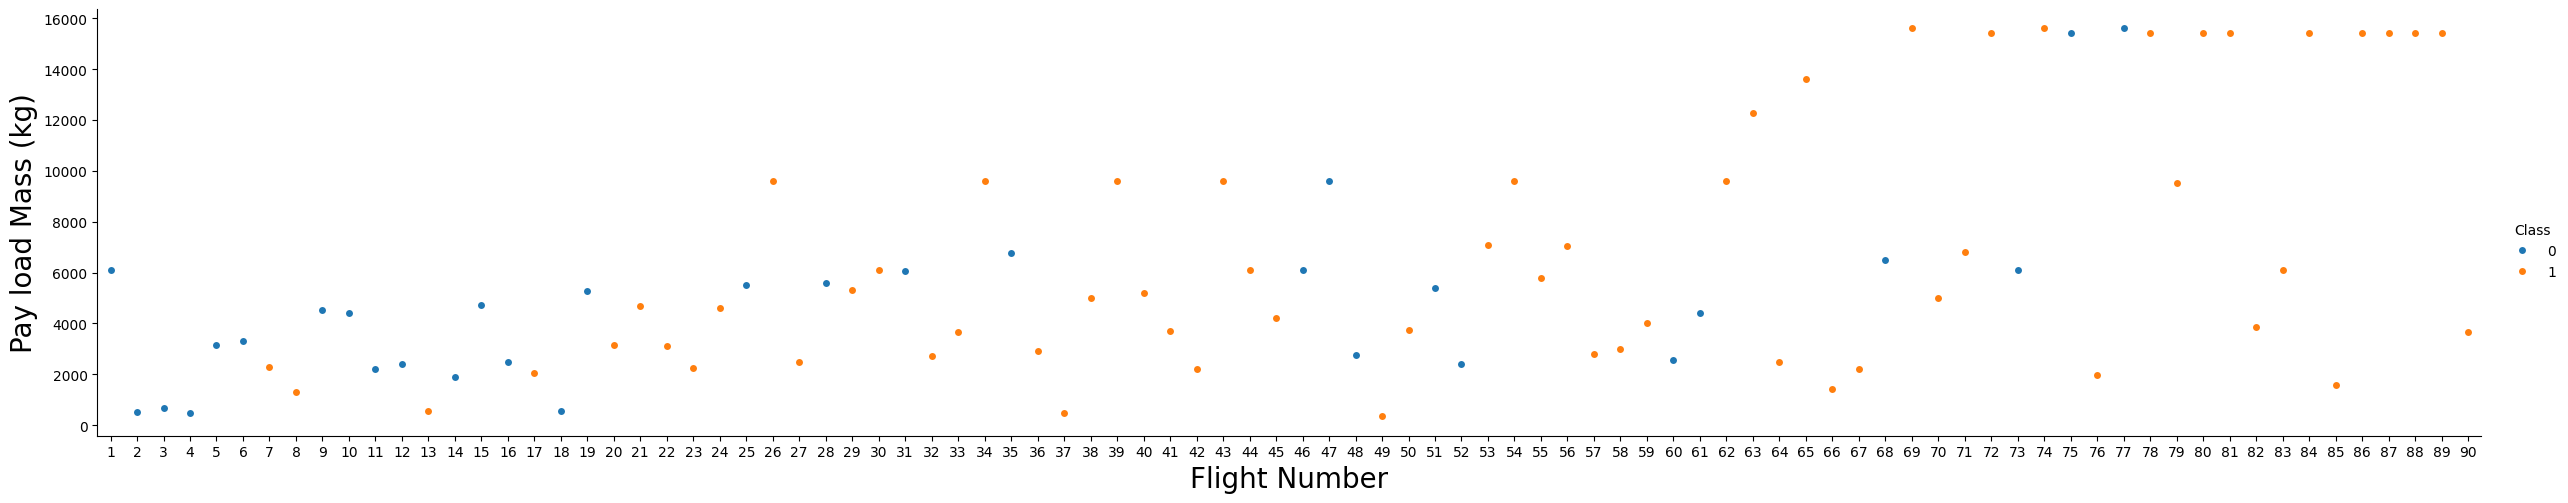

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()


# **TASK 1: Visualize the relationship between Flight Number and Launch Site**

Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

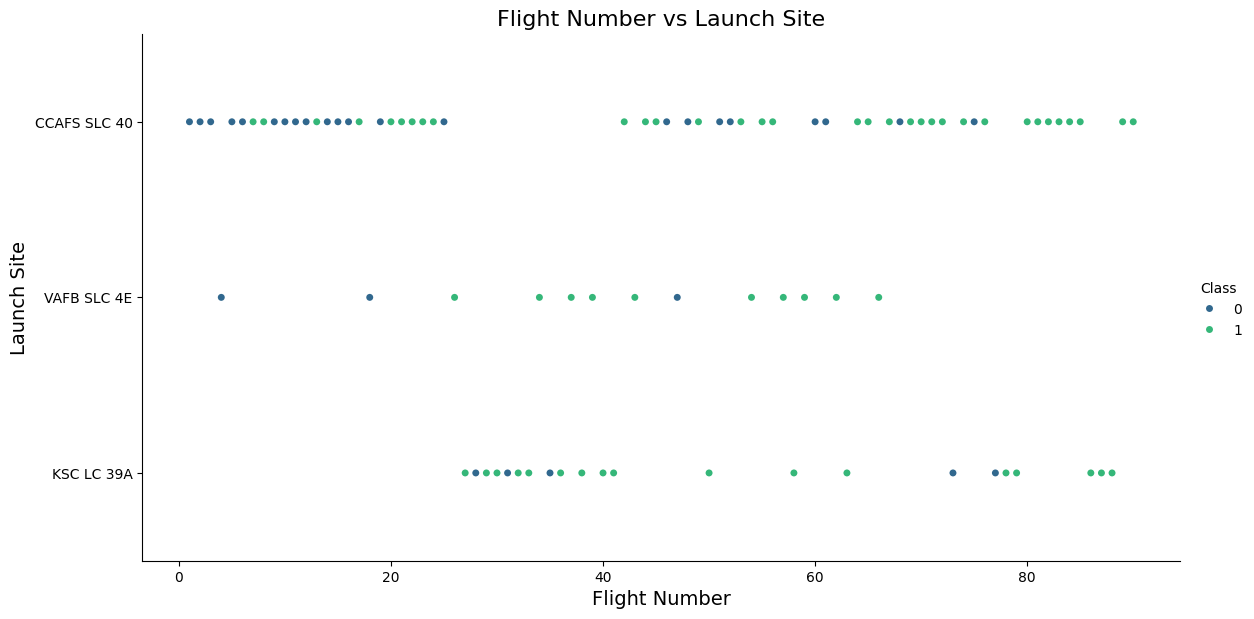

In [ ]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

# Gráfico de FlightNumber vs LaunchSite, coloreado por Class
sns.catplot(
    x="FlightNumber",  # Eje X: FlightNumber
    y="LaunchSite",    # Eje Y: LaunchSite
    hue="Class",       # Colorear por éxito (Class)
    data=df,           # DataFrame con los datos
    aspect=2,          # Ajustar aspecto (ancho)
    height=6,          # Altura del gráfico
    kind="swarm",      # Tipo de gráfico (puntos dispersos)
    palette="viridis"  # Paleta de colores (opcional)
)

# Personalización de etiquetas
plt.title("Flight Number vs Launch Site", fontsize=16)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.show()

# **TASK 2: Visualize the relationship between Payload Mass and Launch Site**

We also want to observe if there is any relationship between launch sites and their payload mass.

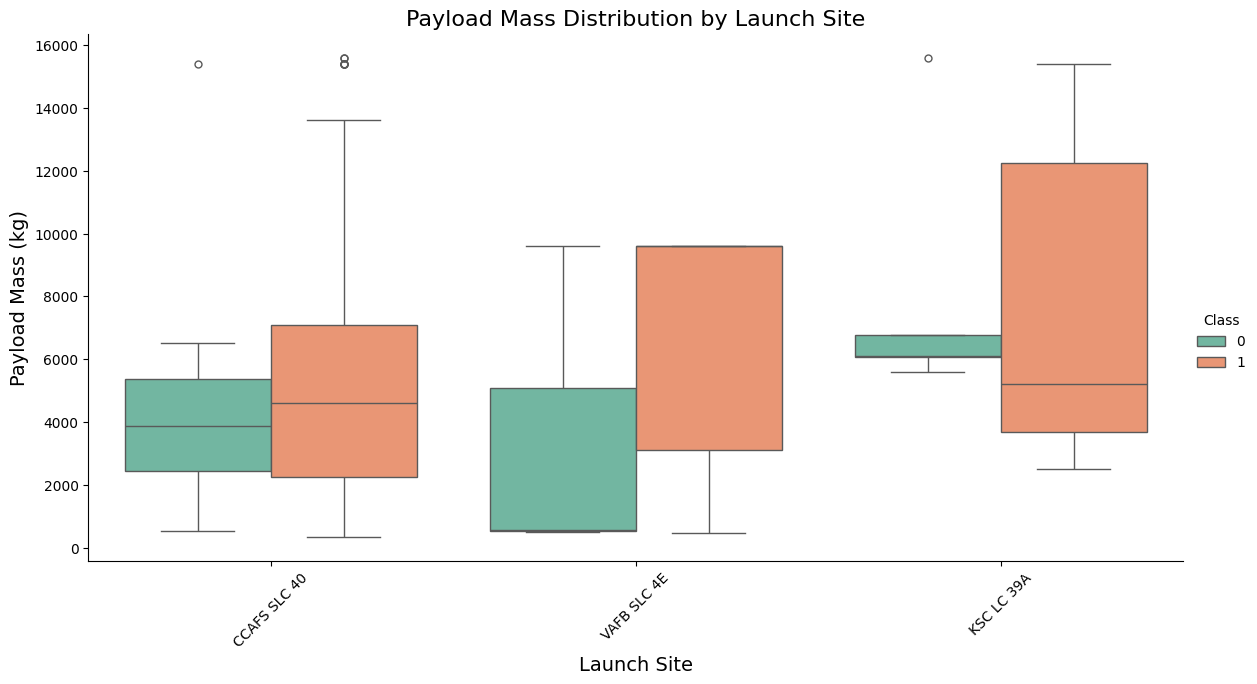

In [ ]:
# Create a boxplot of PayloadMass vs LaunchSite
sns.catplot(
    x="LaunchSite",      # Launch Site on X-axis
    y="PayloadMass",     # Payload Mass on Y-axis
    hue="Class",         # Color by success/failure (optional)
    data=df,
    kind="box",          # Boxplot shows distribution
    height=6,
    aspect=2,
    palette="Set2"       # Color palette
)

plt.title("Payload Mass Distribution by Launch Site", fontsize=16)
plt.xlabel("Launch Site", fontsize=14)
plt.ylabel("Payload Mass (kg)", fontsize=14)
plt.xticks(rotation=45)  # Rotate X-labels if needed
plt.show()

# **TASK 3: Visualize the relationship between success rate of each orbit type**

Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a bar chart for the sucess rate of each orbit

    Orbit  SuccessRate
0   ES-L1     1.000000
1     GEO     1.000000
2     GTO     0.518519
3     HEO     1.000000
4     ISS     0.619048
5     LEO     0.714286
6     MEO     0.666667
7      PO     0.666667
8      SO     0.000000
9     SSO     1.000000
10   VLEO     0.857143


/tmp/ipython-input-11-3480111086.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-11-3480111086.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


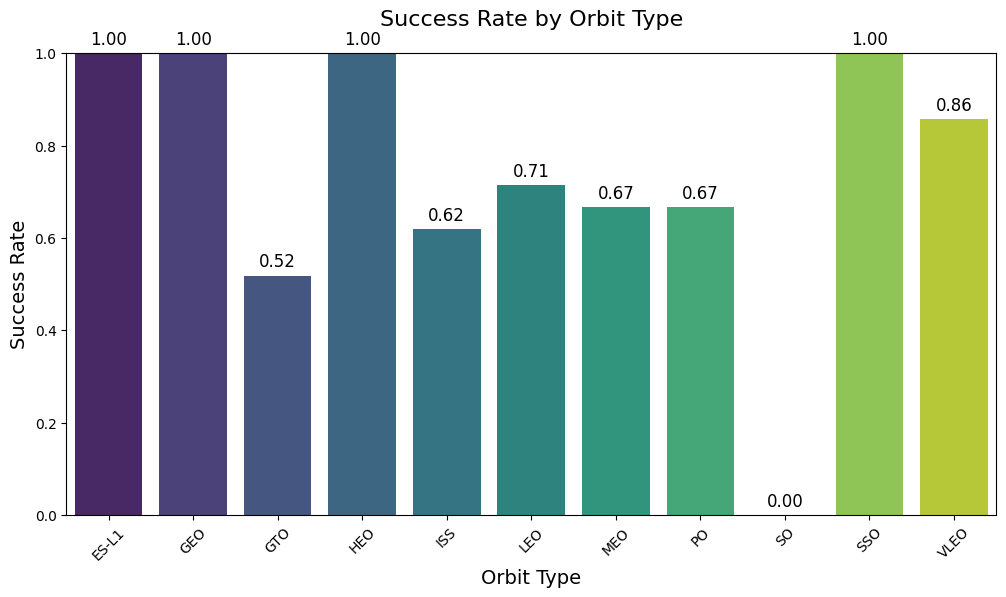

In [ ]:
# Calculate success rate per orbit
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
success_rate.columns = ['Orbit', 'SuccessRate']
print(success_rate)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Orbit',
    y='SuccessRate',
    data=success_rate,
    palette='viridis',  # Color scheme
    ci=None            # Disable confidence intervals
)

# Customize the plot
plt.title('Success Rate by Orbit Type', fontsize=16, pad=20)
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.ylim(0, 1.0)  # Set y-axis from 0 to 1 (since it's a rate)
plt.xticks(rotation=45)  # Rotate orbit names for readability

# Add value labels on top of bars
for index, row in success_rate.iterrows():
    plt.text(
        index,
        row['SuccessRate'] + 0.02,  # Slightly above the bar
        f"{row['SuccessRate']:.2f}", # Format to 2 decimal places
        ha='center',
        fontsize=12
    )

plt.show()

# **TASK 4: Visualize the relationship between FlightNumber and Orbit type**

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

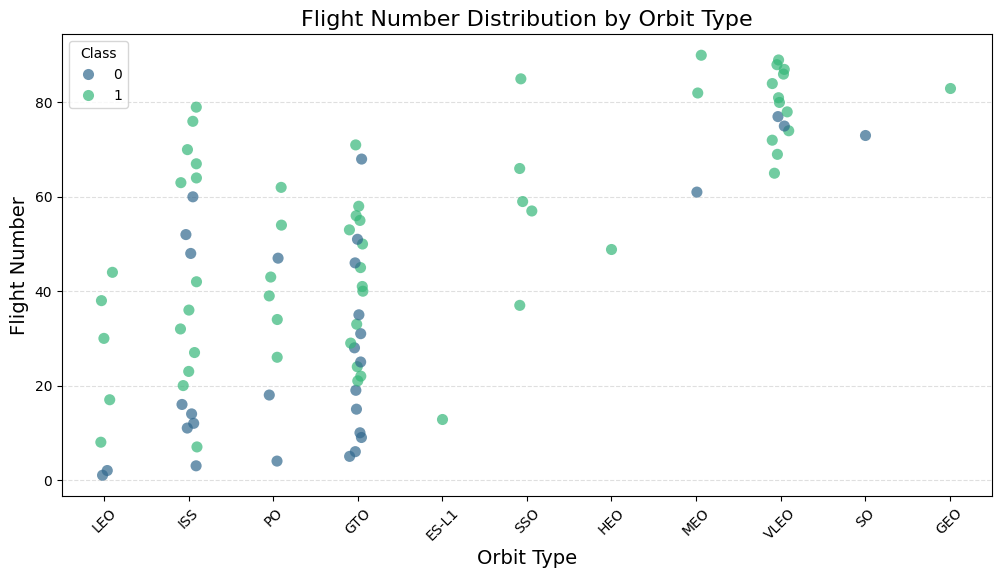

In [ ]:
plt.figure(figsize=(12, 6))
sns.stripplot(
    x='Orbit',
    y='FlightNumber',
    data=df,
    hue='Class',       # Optional: Color by mission success
    palette='viridis',
    jitter=True,       # Avoids dot overlap
    size=8,
    alpha=0.7
)

plt.title('Flight Number Distribution by Orbit Type', fontsize=16)
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Flight Number', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

## **TASK 5: Visualize the relationship between Payload Mass and Orbit type**

Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type

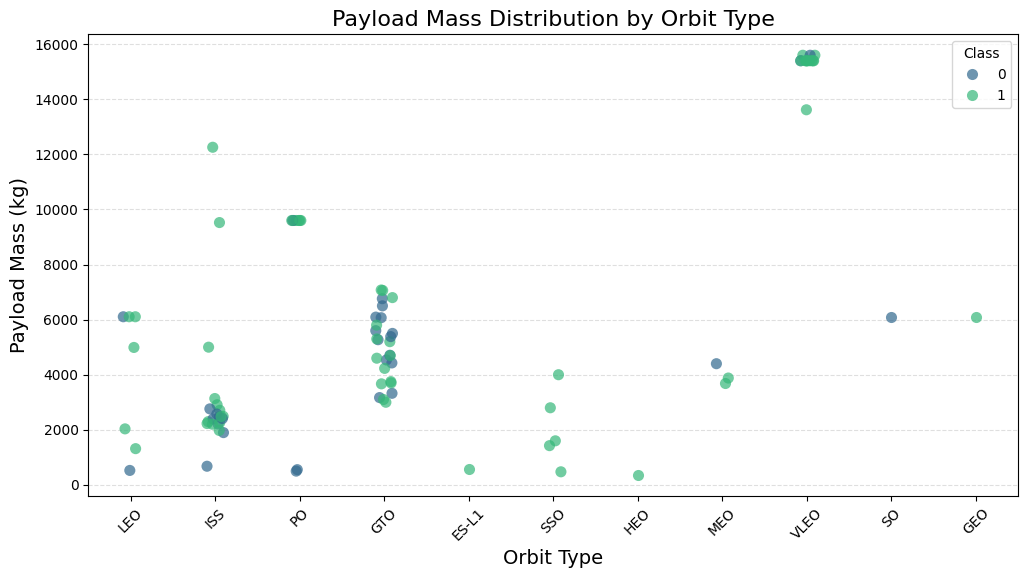

In [ ]:
plt.figure(figsize=(12, 6))
sns.stripplot(
    x='Orbit',
    y='PayloadMass',
    data=df,
    hue='Class',       # Optional: Color by mission success
    palette='viridis',
    jitter=True,       # Avoids dot overlap
    size=8,
    alpha=0.7
)

plt.title('Payload Mass Distribution by Orbit Type', fontsize=16)
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Payload Mass (kg)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

# **TASK 6: Visualize the launch success yearly trend**

You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

   Year     Class
0  2010  0.000000
1  2012  0.000000
2  2013  0.000000
3  2014  0.333333
4  2015  0.333333
5  2016  0.625000
6  2017  0.833333
7  2018  0.611111
8  2019  0.900000
9  2020  0.842105


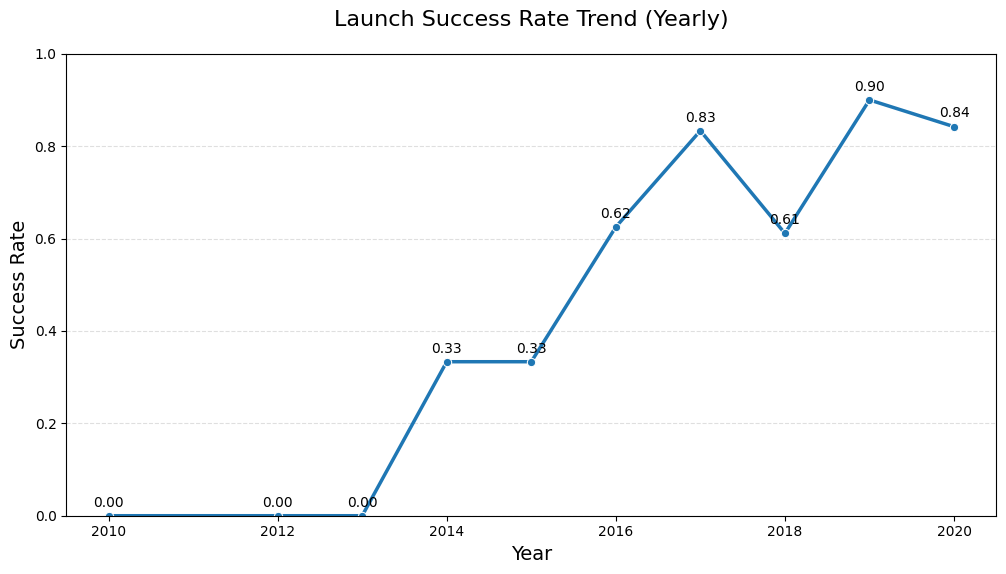

In [ ]:
# Convert 'Date' to datetime and extract year
df['Year'] = pd.to_datetime(df['Date']).dt.year
yearly_success = df.groupby('Year')['Class'].mean().reset_index()
print(yearly_success)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Year',
    y='Class',
    data=yearly_success,
    marker='o',        # Show markers for each year
    linewidth=2.5,
    color='#1f77b4'    # Matplotlib blue
)

# Customize the plot
plt.title('Launch Success Rate Trend (Yearly)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.ylim(0, 1.0)      # Success rate ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels
for _, row in yearly_success.iterrows():
    plt.text(
        row['Year'],
        row['Class'] + 0.02,
        f"{row['Class']:.2f}",
        ha='center',
        fontsize=10
    )

plt.show()

# **TASK 7: Create dummy variables to categorical columns**

Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [ ]:
# List of columns to one-hot encode
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']  # Adjust if column names differ
# One-hot encode categorical columns
features_one_hot = pd.get_dummies(
    df,                  # Original DataFrame
    columns=categorical_cols,  # Columns to encode
    prefix=categorical_cols,   # Optional: Add prefix to new columns
    drop_first=False           # Keep all categories (set to True to avoid multicollinearity)
)

# Display the first 5 rows
features_one_hot.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010-06-04,Falcon 9,6104.959412,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2,2012-05-22,Falcon 9,525.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2013-03-01,Falcon 9,677.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2013-09-29,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5,2013-12-03,Falcon 9,3170.000000,None None,1,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False


# **TASK 8: Cast all numeric columns to float64**

Now that our features_one_hot dataframe only contains numbers, cast the entire dataframe to variable type float64

In [ ]:


# Sample data (after one-hot encoding)
data = {
    'FlightNumber': [1, 2, 3],
    'Class': [1.0, 1.0, 0.0],
    'Orbit_GTO': [1.0, 0.0, 1.0],
    'Orbit_LEO': [0.0, 1.0, 0.0]
}
features_one_hot = pd.DataFrame(data)

# Cast to float64
features_one_hot = features_one_hot.astype('float64')

# Output
print("Data types after conversion:")
print(features_one_hot.dtypes)
print("\nDataFrame:")
features_one_hot.head()

Data types after conversion:
FlightNumber    float64
Class           float64
Orbit_GTO       float64
Orbit_LEO       float64
dtype: object

DataFrame:


,FlightNumber,Class,Orbit_GTO,Orbit_LEO
0,1.0,1.0,1.0,0.0
1,2.0,1.0,0.0,1.0
2,3.0,0.0,1.0,0.0


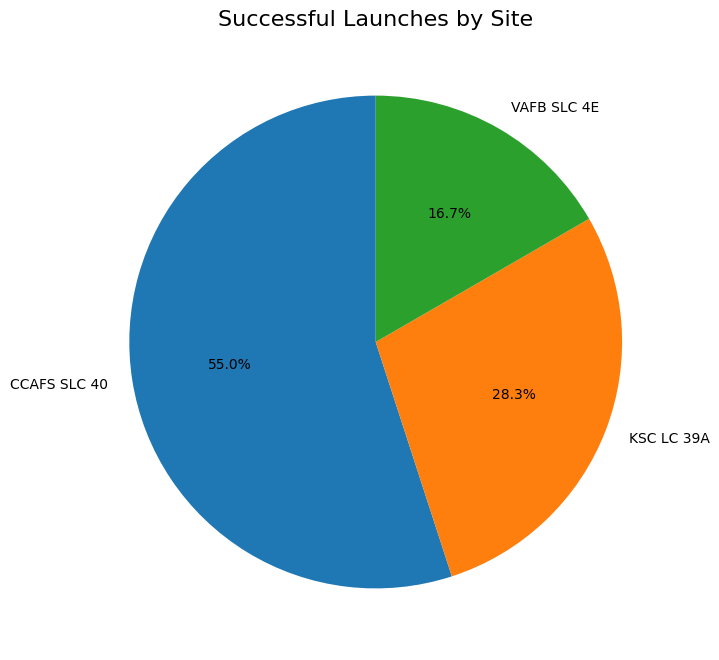

In [ ]:
# Calculate success counts per site
success_counts = df[df['Class']==1].groupby('LaunchSite').size()

plt.figure(figsize=(8,8))
plt.pie(success_counts, labels=success_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Successful Launches by Site', fontsize=16)
plt.show()

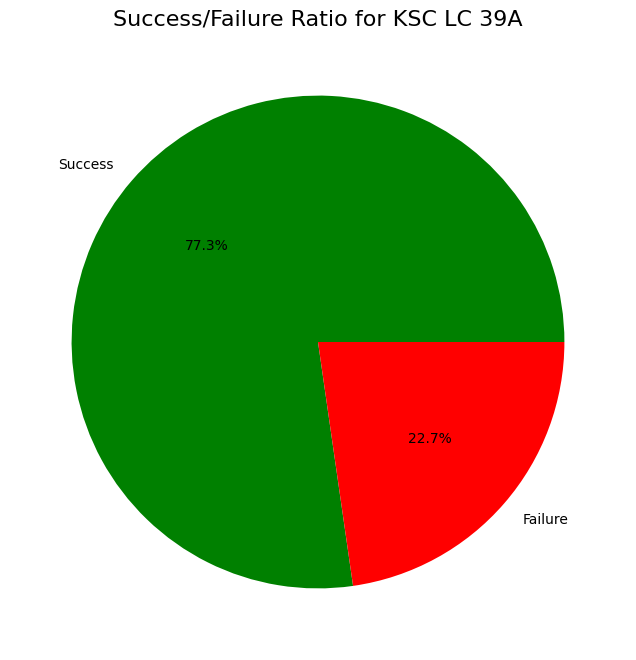

In [ ]:
# Calculate success rates per site
success_rates = df.groupby('LaunchSite')['Class'].mean()
best_site = success_rates.idxmax()

# Filter data for best site
best_site_data = df[df['LaunchSite']==best_site]
counts = best_site_data['Class'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(counts, labels=['Success', 'Failure'], autopct='%1.1f%%', colors=['green','red'])
plt.title(f'Success/Failure Ratio for {best_site}', fontsize=16)
plt.show()

In [ ]:
import plotly.express as px
from ipywidgets import interact

# Create the base figure
fig = px.scatter(df, x='PayloadMass', y='Class',
                 color='LaunchSite',
                 title='Payload Mass vs. Launch Outcome',
                 labels={'PayloadMass': 'Payload Mass (kg)', 'Class': 'Launch Outcome (1=Success)'},
                 hover_data=['FlightNumber', 'Orbit'])

# Add dropdown menu for payload ranges
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="All Payloads",
                     method="relayout",
                     args=[{"xaxis.range": [min(df['PayloadMass']), max(df['PayloadMass'])]}]),
                dict(label="Light (<4000 kg)",
                     method="relayout",
                     args=[{"xaxis.range": [min(df['PayloadMass']), 4000]}]),
                dict(label="Medium (4000-8000 kg)",
                     method="relayout",
                     args=[{"xaxis.range": [4000, 8000]}]),
                dict(label="Heavy (>8000 kg)",
                     method="relayout",
                     args=[{"xaxis.range": [8000, max(df['PayloadMass'])]}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

fig.show()